In [1]:
# MNIST Digit Classification using Neural Networks

'''This notebook implements a complete machine learning pipeline for the MNIST digit classification task using TensorFlow/Keras and includes:
1. Data Loading and Preprocessing
2. Model Creation and Training
3. Model Evaluation
4. Model Serialization using Pickle'''

'This notebook implements a complete machine learning pipeline for the MNIST digit classification task using TensorFlow/Keras and includes:\n1. Data Loading and Preprocessing\n2. Model Creation and Training\n3. Model Evaluation\n4. Model Serialization using Pickle'

In [10]:
# Import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import seaborn as sns
import pickle
import os

## 1. Data Loading and Preprocessing

Load the MNIST dataset and preprocess it for training:

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Data preprocessing
def preprocess_data(X):
    # Convert to float32 and scale to [0,1]
    X = X.astype('float32') / 255.0
    return X

# Preprocess training and test data
X_train_processed = preprocess_data(X_train)
X_test_processed = preprocess_data(X_test)

print("Training data shape:", X_train_processed.shape)
print("Test data shape:", X_test_processed.shape)
print("Number of classes:", len(np.unique(y_train)))

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Number of classes: 10


## 2. Model Creation and Training

Create and train the neural network model:

In [13]:

# Create the model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    callback = EarlyStopping(monitor='val_loss', patience=3)

    return model, callback

# Create and train the model
model, callback = create_model()
history = model.fit(
    X_train_processed,
    y_train,
    epochs=15,
    validation_split=0.2,
    callbacks=[callback],
    batch_size=32
)

Epoch 1/15


c:\Users\Rafin\Desktop\House Prices\ds_venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8175 - loss: 0.5886 - val_accuracy: 0.9490 - val_loss: 0.1764
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9212 - loss: 0.2783 - val_accuracy: 0.9609 - val_loss: 0.1327
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9391 - loss: 0.2123 - val_accuracy: 0.9647 - val_loss: 0.1248
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9506 - loss: 0.1738 - val_accuracy: 0.9687 - val_loss: 0.1126
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9554 - loss: 0.1539 - val_accuracy: 0.9707 - val_loss: 0.1032
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9605 - loss: 0.1335 - val_accuracy: 0.9723 - val_loss: 0.1096
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9635 - loss: 0.1238 - val_accuracy: 0.9736 - val_loss: 0.1051
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9667 - loss: 0.1125 - val_accurac

## 3. Model Evaluation

Evaluate the model's performance:

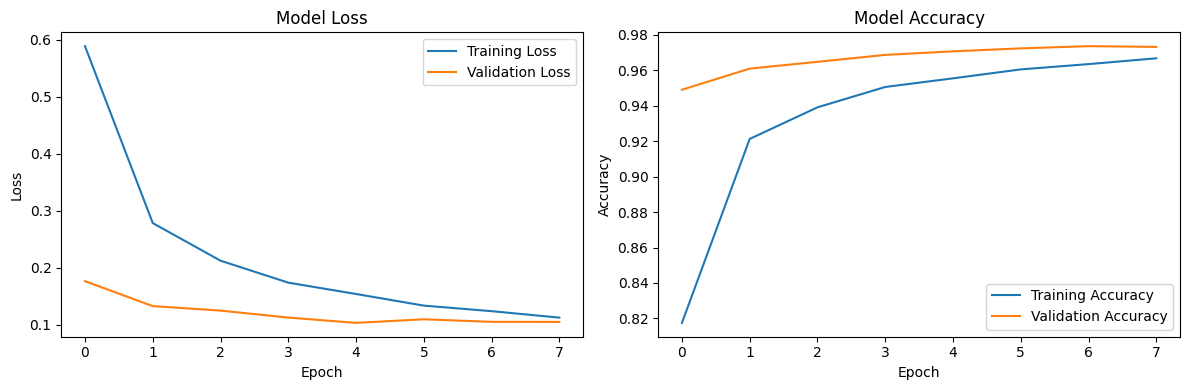

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.95      0.98      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.96      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



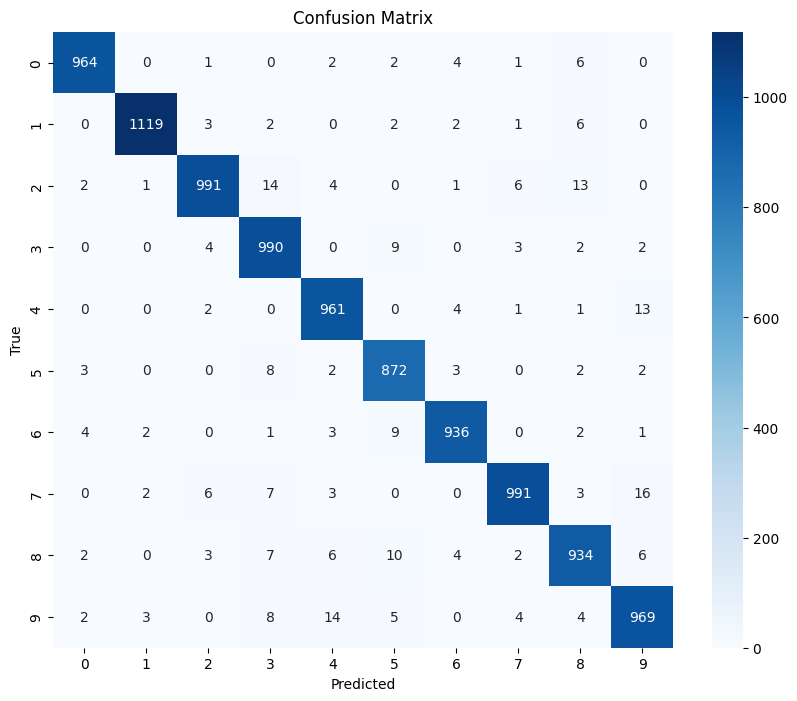

In [14]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on test set
y_pred_proba = model.predict(X_test_processed)
y_pred = np.argmax(y_pred_proba, axis=1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## 4. Model Serialization

Save and load the model using pickle:

Model pipeline saved to mnist_pipeline.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


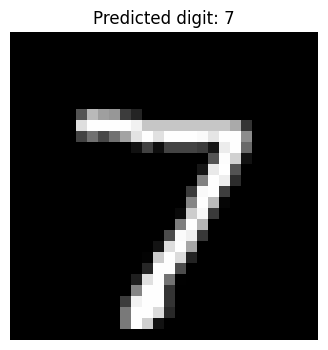

In [ ]:
# Create a pipeline dictionary containing the model and preprocessing information
pipeline = {
    'model': model,
    'preprocessing_func': preprocess_data,
    'input_shape': (28, 28),
    'num_classes': 10
}

# Save the pipeline using pickle
model_path = 'mnist_pipeline.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(pipeline, f)

print(f"Model pipeline saved to {model_path}")

# Function to load and use the pipeline
def load_pipeline(model_path):
    with open(model_path, 'rb') as f:
        pipeline = pickle.load(f)
    return pipeline

# Test loading and using the pipeline
loaded_pipeline = load_pipeline(model_path)
test_image = X_test[0:1]  # Take one test image
processed_image = loaded_pipeline['preprocessing_func'](test_image)
prediction = loaded_pipeline['model'].predict(processed_image)
predicted_digit = np.argmax(prediction[0])

plt.figure(figsize=(6, 4))
plt.imshow(X_test[0], cmap='gray')
plt.title(f'Predicted digit: {predicted_digit}')
plt.axis('off')
plt.show()